# Master M2DS-SAF: TP Optimisation

## Méthodes de descente: gradient, Newton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field

Dans ce TP sont considérés et comparés les algorithmes de gradient et de Newton sans contrainte. Il est suggéré de regarder plus particulièrement le cas d'une fonction quadratique et de la fonction banane de Rosenbrock. L'optimisation se fera par rapport à $x=(x_1,x_2)$ dans $\mathbb{R}^2$.

Le code suivant définit une classe avec la fonction de Rosenbrock et les méthodes <code>grad</code>, <code>hess</code> qui renvoient le gradient et le Hessien. La fonction est définie par:
$$
f(x) = (x_1-1)^2+\alpha(x_1^2-x2)^2
$$
Il s'agit d'une fonction non convexe.

In [2]:
class Rosenbrock(object):
    """
    Class for Rosenbrock (banana-like) function (x1-1)**2+alpha*(x1**2-x2)**2

    Attributes
    ----------
    alpha : float, default = 100

    Methods
    -------
    __call__ : computes function value at x
    grad(x) : computes gradient at x
    hess(x) : computes Hessian at x
    """
    def __init__(self, alpha=100):
        self.alpha = alpha

    def __call__(self, x):
        """
        Computes function's value

        Parameters
        ----------
        x : array_like

        Returns
        -------
        y : float
        """
        y = (x[0]-1)**2 + self.alpha*(x[0]**2-x[1])**2
        return y

    def grad(self, x):
        """
        Computes function's gradient

        Parameters
        ----------
        x : array_like

        Returns
        -------
        g : array_like
        """
        grad = np.c_[(2*(x[0]-1) + 4*self.alpha*x[0]*(x[0]**2-x[1]),
                      -2*self.alpha*(x[0]**2-x[1]))].T
        return grad

    def hess(self, x):
        """
        Computes function's Hessian

        Parameters
        ----------
        x : array_like

        Returns
        -------
        H : array_like
        """
        hessian = np.empty([2, 2])
        hessian[0, 0] = 2 + 4*self.alpha*(3*x[0]**2-x[1])
        hessian[0, 1] = -4*self.alpha*x[0]
        hessian[1, 0] = hessian[0, 1]
        hessian[1, 1] = 2*self.alpha
        return hessian

Le code suivant définit une classe avec une fonction quadratique et les méthodes <code>grad</code>, <code>hess</code> qui renvoient le gradient et le Hessien.

In [3]:
class Quadfunc(object):
    """
    class for quadratic function 1/2*x.T@Q@x

    Attributes
    ----------
    A : array_like, default = np.eye(2)

    Methods
    -------
    __call__ : computes function value at x
    grad(x) : computes gradient at x
    hess(x) : computes Hessian at x
    """
    def __init__(self, Q=np.eye(2)):
        self.Q = Q

    def __call__(self, x):
        y = 1/2*((self.Q@x)*x).sum(axis=0)
        return y

    def grad(self, x):
        grad = 1/2*(self.Q+self.Q.T)@x
        return grad

    def hess(self, x):
        hessian = 1/2*(self.Q+self.Q.T)
        return hessian

### Tracé de la fonction à étudier

In [4]:
def plotobjective(f):
    """
    Function to draw contour plot of objective function.
    
    Parameters
    ----------
    f : objective function (given as a class with __call__, grad
        and hess methods)
        
    Returns
    -------
    fig : same as fig, ax returned by plt.subplots
    ax  : same as fig, ax returned by plt.subplots
    
    Example
    -------
    objfun = Rosenbrock(100) # choisir la fonction
    fig1, ax1 = plotobjective(objfun)
    """
    N = 100
    x = np.linspace(-1.5, 1.5, N)
    y = np.linspace(-1.5, 1.5, N)
    X, Y = np.meshgrid(x, y)
    z = f(np.vstack((X.ravel(), Y.ravel())))

    fig, ax = plt.subplots(figsize=(6, 6), num=1, clear=True)
    ax.contour(X, Y, z.reshape(N, N), 20, linestyles='dashed', linewidths=0.5)
    return fig, ax

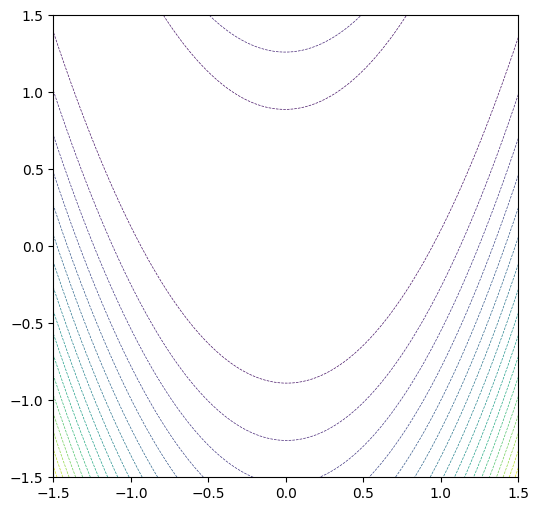

In [5]:
objfun = Rosenbrock()
fig1, ax1 = plotobjective(objfun)

### Algorithmes de gradient et de Newton

Ecrire un algorithme de descente de gradient et un algorithme de Newton. On testera différentes méthodes de choix du pas (fixe, Armijo,...). Prévoir une procédure de recherche de pas par la règle d'Armijo.

### Test algorithme de gradient

Penser à tester un pas fixe et le pas par la méthode d'Armijo avec différentes valeurs.

### Test algorithme de Newton

Penser à tester un pas fixe et le pas par la méthode d'Armijo avec différentes valeurs.